In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from data_utils import data_reader, patient_splitter, Infector_chooser, one_hot, frequency_count
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]

### 读数据

In [2]:
data_path = './data'
data_file = "治疗过程记录.xlsx"
output_path = './outputs'
data = data_reader(data_path,data_file,fill_na="")

data

,mr_bah,mr_xb,mr_nn,mr_sjzyts,mr_cyzyzdmc,mr_cyqtzdmc1,mr_cyqtzdmc2,mr_cyqtzdmc3,mr_cyqtzdmc4,mr_cyqtzdmc5,...,specimen_code,item_group_name,item_code,item_name,result_quantitative,result_qualitative,result_unit,reference_range,reference_range_alert,report_date
1,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063653,脑脊液生化(检),D0031,葡萄糖[Glu],0.59,0.59,mmol/L,2.5-4.5,L,20220706
2,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063653,脑脊液生化(检),D0087,微量蛋白[MTP],2.02,2.02,g/L,0.15-0.45,H,20220706
3,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063654,脑脊液细胞学检查(检),C0095,蛋白定性,250,阳性(+),,,,20220706
4,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063654,脑脊液常规(检),C0093,透明度,244,混浊,,,,20220706
5,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063654,脑脊液细胞学检查(检),C0093,透明度,244,混浊,,,,20220706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8368,L0001185712,1,66岁,22,枕叶出血,脑水肿,高血压病3级（极高危）,肺原位癌,肺部阴影,肺气肿,...,2311280890,脑脊液常规(检),C0093,透明度,244,混浊,,,,20231128
8369,L0001185712,1,66岁,22,枕叶出血,脑水肿,高血压病3级（极高危）,肺原位癌,肺部阴影,肺气肿,...,2311280890,脑脊液细胞学检查(检),C0100,多个核细胞百分比,70,70,%,,,20231128
8370,L0001185712,1,66岁,22,枕叶出血,脑水肿,高血压病3级（极高危）,肺原位癌,肺部阴影,肺气肿,...,2311280891,脑脊液生化(检),D0031,葡萄糖[Glu],2.70,2.70,mmol/L,2.5-4.5,,20231128
8371,L0001185712,1,66岁,22,枕叶出血,脑水肿,高血压病3级（极高危）,肺原位癌,肺部阴影,肺气肿,...,2311280891,脑脊液生化(检),D0087,微量蛋白[MTP],1.88,1.88,g/L,0.15-0.45,H,20231128


## 手术分析

In [3]:
Patients = patient_splitter(data)
Patients

,mr_bah,mr_xb,mr_nn,mr_sjzyts,mr_cyzyzdmc,mr_cyqtzdmc1,mr_cyqtzdmc2,mr_cyqtzdmc3,mr_cyqtzdmc4,mr_cyqtzdmc5,...,mr_ssmc1,mr_ssmzfs1,mr_sscxsj1,mr_ssmc2,mr_ssmzfs2,mr_ssmc3,mr_ssmzfs3,mr_ssmc4,mr_ssmzfs4,mr_sscxsj4
1,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,脑内血肿清除术,气管插管全麻,4,硬脑膜补片修补术,气管插管全麻,颅骨去骨瓣减压术,气管插管全麻,颅内血肿硬通道穿刺引流术,局部浸润麻醉,1
130,L0001106901,1,60岁,187,创伤性蛛网膜下腔出血,开放性颅脑损伤重型,脑挫伤,颅内感染,创伤性颅内血肿,创伤性脑脊液漏,...,颅骨钻孔减压术,局部浸润麻醉,3,硬脑膜下腔穿刺抽吸术,局部浸润麻醉,腰大池引流术,局部浸润麻醉,腰椎穿刺术,局部浸润麻醉,0.5
156,L0001118051,1,56岁,187,创伤性脑出血,闭合性颅脑损伤重型,多发性大脑挫裂伤,创伤性慢性硬膜下血肿,创伤性蛛网膜下腔出血,昏迷,...,颅内血肿清除术,气管插管全麻,4,颅骨去骨瓣减压术,气管插管全麻,侧脑室脑池造口引流术,局部浸润麻醉,侧脑室腹腔内分流术,气管插管全麻,2
750,L0001121508,1,62岁,197,基底节出血,脑内出血,额叶出血,顶叶出血,颞叶出血,继发性脑室出血,...,脑内血肿清除术,支气管插管全麻,4,侧脑室脑池造口引流术,支气管插管全麻,脑室-腹腔分流术,支气管插管全麻,脑室分流管去除术,气管插管全麻,3
1067,L0001123366,2,58岁,118,额叶恶性肿瘤,气管切开术后拔管困难,后天性颅骨缺损,神经源性休克,肺部感染,下肢静脉血栓形成,...,大脑半球病损切除术,气管插管全麻,6,硬脑膜补片修补术,气管插管全麻,下腔静脉滤器置入术,局部浸润麻醉,呼吸机治疗[大于等于96小时],气管插管全麻,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8266,L0001182434,1,59岁,20,三叉神经痛,小脑出血,高血压病3级（极高危）,,,,...,内镜下三叉神经微血管减压术,气管插管全麻,4,,,,,,,
8292,L0001184723,2,44岁,18,脑动脉瘤破裂伴蛛网膜下腔出血,高血压病3级（高危）,,,,,...,经导管颅内动脉瘤支架辅助栓塞术,气管插管全麻,4,脑血管造影,气管插管全麻,,,,,
8321,L0001185049,2,51岁,14,面肌痉挛,颅内感染,,,,,...,面神经微血管减压术,气管插管全麻,3,,,,,,,
8334,L0001185394,2,56岁,21,脑室出血,肺部感染,呼吸衰竭,高血压病3级（极高危）,腔隙性脑梗死,腰椎骨质增生,...,脑内血肿清除术,气管插管全麻,4,脑室钻孔引流术,局部浸润麻醉,,,,,


In [4]:
infection_df, noninfection_df, infection_index = Infector_chooser(Patients,index=True)

indicators = ['mr_bah','mr_ssmc1', 'mr_ssmzfs1', 'mr_sscxsj1', 'mr_ssmc2',
       'mr_ssmzfs2', 'mr_ssmc3', 'mr_ssmzfs3', 'mr_ssmc4', 'mr_ssmzfs4',
       'mr_sscxsj4']
infection_df = infection_df[indicators]
noninfection_df = noninfection_df[indicators]

infection_df

,mr_bah,mr_ssmc1,mr_ssmzfs1,mr_sscxsj1,mr_ssmc2,mr_ssmzfs2,mr_ssmc3,mr_ssmzfs3,mr_ssmc4,mr_ssmzfs4,mr_sscxsj4
1,L0001110255,脑内血肿清除术,气管插管全麻,4,硬脑膜补片修补术,气管插管全麻,颅骨去骨瓣减压术,气管插管全麻,颅内血肿硬通道穿刺引流术,局部浸润麻醉,1
130,L0001106901,颅骨钻孔减压术,局部浸润麻醉,3,硬脑膜下腔穿刺抽吸术,局部浸润麻醉,腰大池引流术,局部浸润麻醉,腰椎穿刺术,局部浸润麻醉,0.5
156,L0001118051,颅内血肿清除术,气管插管全麻,4,颅骨去骨瓣减压术,气管插管全麻,侧脑室脑池造口引流术,局部浸润麻醉,侧脑室腹腔内分流术,气管插管全麻,2
750,L0001121508,脑内血肿清除术,支气管插管全麻,4,侧脑室脑池造口引流术,支气管插管全麻,脑室-腹腔分流术,支气管插管全麻,脑室分流管去除术,气管插管全麻,3
1080,L0001125144,脑室钻孔引流术,局部浸润麻醉,1,脑室Ommaya泵置入术,气管插管全麻,脑室分流术,气管插管全麻,脑室分流管去除术,气管插管全麻,6
1663,L0001129332,脑内血肿清除术,气管插管全麻,3,颅骨去骨瓣减压术,气管插管全麻,皮肤和皮下组织非切除性清创,气管插管全麻,皮肤和皮下组织切开引流术,气管插管全麻,
1723,L0001129840,小脑病损切除术,气管插管全麻,1,脑干病损切除术,气管插管全麻,硬脑膜补片修补术,气管插管全麻,颅骨钻孔引流术,局部浸润麻醉,
2571,L0001135640,内镜下三叉神经微血管减压术,气管插管全麻,3,腰椎穿刺术,局部浸润麻醉,腰椎穿刺术,局部浸润麻醉,头部CT检查,,-
3107,L0001130295,内镜下面神经微血管减压术,气管插管全麻,2,,,,,,,
4355,L0000903157,颅内血肿硬通道穿刺引流术,局部浸润麻醉,1.0,腰椎穿刺术,局部浸润麻醉,腰椎穿刺术,局部浸润麻醉,腰椎穿刺术,局部浸润麻醉,0.5


### 探讨手术类型对感染的影响

In [5]:
frequency_count

<function data_utils.frequency_count(df)>

In [6]:
op_labels = ['mr_ssmc1', 'mr_ssmc2', 'mr_ssmc3', 'mr_ssmc4']

op_df = Patients[op_labels]

op_freq = frequency_count(op_df)
categories = op_freq['word']
max_index = categories.index.max()
categories.loc[max_index + 1] = '颅内感染'
num_categories = len(categories)
op_df["res"] = ""
op_df

C:\Users\hasaki\AppData\Local\Temp\ipykernel_17208\3595210172.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  op_df["res"] = ""


,mr_ssmc1,mr_ssmc2,mr_ssmc3,mr_ssmc4,res
1,脑内血肿清除术,硬脑膜补片修补术,颅骨去骨瓣减压术,颅内血肿硬通道穿刺引流术,
130,颅骨钻孔减压术,硬脑膜下腔穿刺抽吸术,腰大池引流术,腰椎穿刺术,
156,颅内血肿清除术,颅骨去骨瓣减压术,侧脑室脑池造口引流术,侧脑室腹腔内分流术,
750,脑内血肿清除术,侧脑室脑池造口引流术,脑室-腹腔分流术,脑室分流管去除术,
1067,大脑半球病损切除术,硬脑膜补片修补术,下腔静脉滤器置入术,呼吸机治疗[大于等于96小时],
...,...,...,...,...,...
8266,内镜下三叉神经微血管减压术,,,,
8292,经导管颅内动脉瘤支架辅助栓塞术,脑血管造影,,,
8321,面神经微血管减压术,,,,
8334,脑内血肿清除术,脑室钻孔引流术,,,


In [7]:
from data_utils import one_hot

contains_infection = Patients[['mr_cyzyzdmc', 'mr_cyqtzdmc1',
       'mr_cyqtzdmc2', 'mr_cyqtzdmc3', 'mr_cyqtzdmc4', 'mr_cyqtzdmc5',
       'mr_cyqtzdmc6', 'mr_cyqtzdmc7', 'mr_cyqtzdmc8', 'mr_cyqtzdmc9',
       'mr_cyqtzdmc10']].apply(lambda row: '颅内感染' in row.values, axis=1)

op_df.loc[contains_infection, op_df.columns[-1]] = "颅内感染"

one_hot_matrix = one_hot(op_df,categories)
one_hot_df = pd.DataFrame(one_hot_matrix)
col_data = one_hot_df["颅内感染"]
one_hot_df.drop("颅内感染", axis=1, inplace=True)
one_hot_df["颅内感染"] = col_data
one_hot_df

word,腰椎穿刺术,脑血管造影,硬脑膜补片修补术,颅骨去骨瓣减压术,脑内血肿清除术,内镜下面神经微血管减压术,脑室钻孔引流术,内镜下三叉神经微血管减压术,腰大池引流术,头部CT检查,...,胸腔镜下肺楔形切除术,胸腔闭式引流术,骨盆骨折切开复位钢板内固定术,皮肤和皮下坏死组织切除清创术,大脑中动脉（MCA分叉部）动脉瘤栓塞术（AN）,硬脑膜外切开引流术,额叶切除术,冠状动脉CT血管显像,面神经微血管减压术,颅内感染
0,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
187,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
189,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 保存中间结果

In [8]:
onehot_path = os.path.join(output_path,"onehot_op.csv")

one_hot_tosave = one_hot_df
one_hot_tosave.index = Patients['mr_bah']
one_hot_tosave.to_csv(onehot_path)

In [9]:
freq_list = op_freq['frequency'].to_numpy()
sample_percent = np.cumsum(freq_list) / np.sum(freq_list) 
sample_to_take = sample_percent < 0.9

categories = op_freq[sample_to_take]['word']
num_categories = len(categories)
max_index = categories.index.max()
categories.loc[max_index + 1] = '颅内感染'
categories

C:\Users\hasaki\AppData\Local\Temp\ipykernel_17208\2381365723.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categories.loc[max_index + 1] = '颅内感染'


7              腰椎穿刺术
30             脑血管造影
1           硬脑膜补片修补术
2           颅骨去骨瓣减压术
0            脑内血肿清除术
           ...      
94      经皮颈动脉球囊扩张成形术
81           胸椎磁共振检查
105    Ommaya泵引流管修正术
106        脑脊液切口漏修补术
113             颅内感染
Name: word, Length: 69, dtype: object

In [10]:
category_matrix = one_hot_matrix[categories]

co_occurrence_matrix = category_matrix.T.dot(category_matrix)
correlation_matrix = co_occurrence_matrix.corr()

correlation_matrix

word,腰椎穿刺术,脑血管造影,硬脑膜补片修补术,颅骨去骨瓣减压术,脑内血肿清除术,内镜下面神经微血管减压术,脑室钻孔引流术,内镜下三叉神经微血管减压术,腰大池引流术,头部CT检查,...,椎管内病损切除术,经皮椎动脉颅内段球囊扩张成形术,经皮椎动脉支架置入术,鼻窦CT检查,两根血管操作,经皮颈动脉球囊扩张成形术,胸椎磁共振检查,Ommaya泵引流管修正术,脑脊液切口漏修补术,颅内感染
word,,,,,,,,,,,,,,,,,,,,,
腰椎穿刺术,1.000000,0.123240,0.134638,-0.045413,-0.043359,0.176781,0.049273,0.196978,0.395158,0.088099,...,-0.037637,-0.076992,-0.076992,0.050361,-0.076992,-0.022412,0.047747,-0.053623,-0.053623,0.226313
脑血管造影,0.123240,1.000000,0.228716,0.218767,0.208282,-0.022557,0.051917,-0.046716,-0.004492,-0.074480,...,-0.041495,-0.025118,-0.025118,-0.084883,0.139233,0.467937,-0.059118,-0.059118,-0.059118,0.107931
硬脑膜补片修补术,0.134638,0.228716,1.000000,0.285591,0.208631,0.008797,-0.033769,-0.007042,0.447534,0.048586,...,-0.045113,-0.003845,-0.003845,0.018265,-0.070175,-0.003845,0.058918,-0.064274,-0.064274,0.237260
颅骨去骨瓣减压术,-0.045413,0.218767,0.285591,1.000000,0.910211,-0.021592,0.104795,-0.051068,0.149335,-0.060135,...,-0.040991,0.475448,0.475448,-0.045281,-0.064567,-0.006708,-0.004672,-0.058401,-0.058401,0.155536
脑内血肿清除术,-0.043359,0.208282,0.208631,0.910211,1.000000,-0.005052,0.181409,-0.033256,0.051624,-0.043131,...,-0.034971,0.242581,0.242581,-0.071539,-0.049101,-0.004227,-0.049825,-0.049825,-0.049825,0.181493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
经皮颈动脉球囊扩张成形术,-0.022412,0.467937,-0.003845,-0.006708,-0.004227,-0.047473,-0.043697,-0.061874,-0.078158,-0.092467,...,-0.030083,-0.061538,-0.061538,-0.061538,0.203846,1.000000,-0.042860,-0.042860,-0.042860,-0.045922
胸椎磁共振检查,0.047747,-0.059118,0.058918,-0.004672,-0.049825,-0.033064,-0.054571,-0.043094,0.623730,-0.013905,...,-0.020952,-0.042860,-0.042860,0.326807,-0.042860,-0.042860,1.000000,-0.029851,-0.029851,-0.000901
Ommaya泵引流管修正术,-0.053623,-0.059118,-0.064274,-0.058401,-0.049825,-0.033064,-0.054571,-0.043094,-0.054435,-0.064401,...,-0.020952,-0.042860,-0.042860,-0.042860,-0.042860,-0.042860,-0.029851,1.000000,1.000000,-0.063066


In [11]:
corr_value = 0.4 #相关性阈值
corr_selected = (correlation_matrix.loc['颅内感染'] > corr_value).to_numpy()
high_corr_indicators = categories[corr_selected]
high_corr_indicators

37     内镜下面神经微血管减压术
12         脑室分流管去除术
56         后颅窝病损切除术
17     脑室Ommaya泵置入术
9        侧脑室脑池造口引流术
113            颅内感染
Name: word, dtype: object

In [12]:
co_occurrence_matrix_np = co_occurrence_matrix.to_numpy()
all_freq = np.diagonal(co_occurrence_matrix_np)
infection = co_occurrence_matrix.loc['颅内感染']
condition_prob =  infection / all_freq
condition_prob = pd.DataFrame(condition_prob)

In [13]:
prob_value = 0.5 #概率阈值
prob_selected = (condition_prob >= prob_value).to_numpy()
prob_selected = np.squeeze(prob_selected,axis=1)
high_prob_indicators = categories[prob_selected]
high_prob_indicators

12           脑室分流管去除术
56           后颅窝病损切除术
92         小脑幕脑膜病损切除术
17       脑室Ommaya泵置入术
69     经外周静脉穿刺中心静脉置管术
88       神经导航下颅内病灶切除术
77           颈部血管超声检查
9          侧脑室脑池造口引流术
113              颅内感染
Name: word, dtype: object

In [14]:
a = np.intersect1d(high_prob_indicators,high_corr_indicators)
print(a)

['侧脑室脑池造口引流术' '后颅窝病损切除术' '脑室Ommaya泵置入术' '脑室分流管去除术' '颅内感染']


### 探讨手术时长对感染的影响¶

In [15]:
def op_time_processor(df,columns=None,fill=0):
    if columns is not None:
        df_to_proc = df[columns]
        df_to_proc[df_to_proc == '-'] = fill
        df_to_proc[df_to_proc == ''] = fill
        df.loc[:,columns] = df_to_proc
    else:
        df[df == '-'] = fill
        df[df == ''] = fill
    return df

#### 总时长

In [28]:
op_time = ['mr_sscxsj1', 'mr_sscxsj4']

optime_of_infection = op_time_processor(infection_df[op_time],op_time)
optime_of_noninfection = op_time_processor(noninfection_df[op_time],op_time)
# optime_of_infection

In [17]:
def mean_time_sum(optime_df):
    optime_np = optime_df.astype(float).to_numpy()
    optime_np_count = np.sum(optime_np!=0)
    sumed_optime_np = optime_np.sum(0).sum(0)
    
    return sumed_optime_np / optime_np_count

In [18]:
mean_optime_of_infection =  mean_time_sum(optime_of_infection)
mean_optime_of_noninfection = mean_time_sum(optime_of_noninfection)
print(f"颅内感染者的平均手术时间：{mean_optime_of_infection} \
        \n非颅内感染者的平均手术时间：{mean_optime_of_noninfection}")

颅内感染者的平均手术时间：2.8780487804878048         
非颅内感染者的平均手术时间：2.953416149068323


#### 每项时长

##### 先分析第一项手术与麻醉

预处理

In [27]:
# op_1_label = ['mr_ssmc1', 'mr_ssmzfs1', 'mr_sscxsj1'] # 不再考虑麻醉影响
op_1_label = ['mr_ssmc1', 'mr_sscxsj1']

op1time_df = Patients[op_1_label]
op1time_df = op_time_processor(op1time_df[op_1_label],op_1_label)
# op1time_df

In [20]:
op1_labels = pd.unique(op1time_df['mr_ssmc1'])
# narc1_labels = pd.unique(op1time_df['mr_ssmzfs1'])

op1time_infection_df = op1time_df[infection_index].to_numpy()
op1time_noninfection_df = op1time_df[~infection_index].to_numpy()
# op1time_infection_df.to_numpy()
op1time_infection_labels, inverse_indices, counts = np.unique(op1time_infection_df[:,0], return_inverse=True, return_counts=True)

In [21]:
import torch

def scatter_mean(np_array,index,counts):
    index = torch.tensor(index)
    inputs = torch.tensor(np_array)
    scatter_result = torch.zeros(len(op1time_infection_labels),)
    scatter_result.scatter_add_(0,index,inputs)
    scatter_result /= counts
    return scatter_result

In [22]:
op1time_infection_mean = scatter_mean(op1time_infection_df[:,1].astype(np.float32), inverse_indices,counts)
op1time_infection_mean

tensor([2.7500, 2.8571, 6.0000, 1.0000, 4.0000, 3.5000, 2.0000, 2.0000, 3.6667,
        1.5000, 1.0000, 3.0000, 4.0000, 1.0000, 8.0000, 0.0000, 3.0000, 4.0000,
        1.0000, 3.0000], dtype=torch.float64)

In [23]:
to_filt = np.expand_dims(op1time_noninfection_df[:,0],1)
noninfection_label_filter = np.isin(op1time_noninfection_df[:,0],op1time_infection_labels)
op1time_noninfection_df = op1time_noninfection_df[noninfection_label_filter]
_, inverse_indices, counts = np.unique(op1time_infection_df[:,0], return_inverse=True, return_counts=True)

In [24]:
op1time_noninfection_mean = scatter_mean(op1time_noninfection_df[:,1].astype(np.float32), inverse_indices,counts)
op1time_noninfection_mean

tensor([2.2500, 3.1429, 4.0000, 6.0000, 2.0000, 3.0000, 3.0000, 5.0000, 2.0000,
        3.0000, 3.0000, 3.0000, 2.0000, 3.0000, 5.0000, 2.0000, 4.0000, 2.5000,
        4.0000, 2.0000], dtype=torch.float64)

In [26]:
op1time_infection_mean - op1time_noninfection_mean

tensor([ 0.5000, -0.2857,  2.0000, -5.0000,  2.0000,  0.5000, -1.0000, -3.0000,
         1.6667, -1.5000, -2.0000,  0.0000,  2.0000, -2.0000,  3.0000, -2.0000,
        -1.0000,  1.5000, -3.0000,  1.0000], dtype=torch.float64)

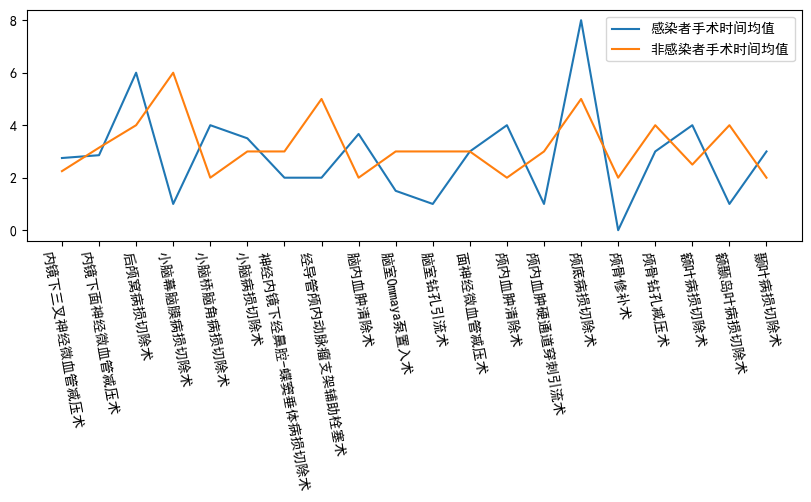

In [25]:
distance = op1time_infection_mean - op1time_noninfection_mean
plt.figure(figsize=(10,3))


plt.xticks(ticks=np.arange(len(op1time_infection_labels)),labels=op1time_infection_labels,rotation=280)

plt.plot(op1time_infection_mean,label='感染者手术时间均值')
plt.plot(op1time_noninfection_mean,label='非感染者手术时间均值')
plt.legend()
plt.show()